### Problem Statement ###


A retail store wants to get insights about its customers. And then build a system that can cluster customers into different groups.

About the dataset
The dataset can be downloaded from the kaggle website which can be found here.

The data includes the following features:

1. Customer ID
2. Customer Gender
3. Customer Age
4. Annual Income of the customer (in Thousand Dollars)
5. Spending score of the customer (based on customer behaviour and spending nature)

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [10]:
#loads the csv file into a pandas dataframe
df= pd.read_csv(r'D:\2.1_codebase\1_Datasets\mall data\Mall_Customers.csv', index_col = 0) 

#returns the first 5 rows
df.head() 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [11]:
#To rename column 2 from Genre to Gender
df.rename(columns= {'Genre': 'Gender'}, inplace = True) 

#Checking if the correction has been effected
df.head() 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [12]:
#returns the data types of the variables
df.dtypes 

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [13]:
#retuns the number of rows and columns in the dataset.
df.shape 

(200, 4)

In [14]:
 #returns the descriptive statistics of the dataset.
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [15]:
#returns the number of missing values
df.isnull().sum() 

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
#Checking for duplicate values.
df.duplicated() 

CustomerID
1      False
2      False
3      False
4      False
5      False
       ...  
196    False
197    False
198    False
199    False
200    False
Length: 200, dtype: bool

Text(0.5, 1.0, 'Scatterplot Between Annual Income (k$) and Spending Score (1-100)')

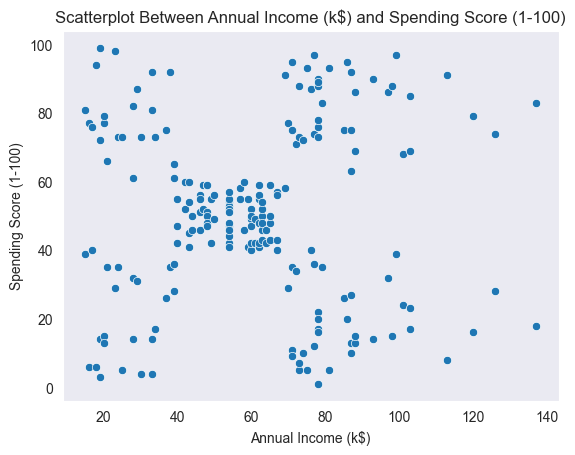

In [17]:
sns.set_style('dark')
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot Between Annual Income (k$) and Spending Score (1-100)')

In [18]:
X = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler and specify the range
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to your data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

In [27]:
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X) #Finds the Kmeans to our data
    wcss.append(kmeans.inertia_) #This gives us the wcss values for each clusters

C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

<function matplotlib.pyplot.show(close=None, block=None)>

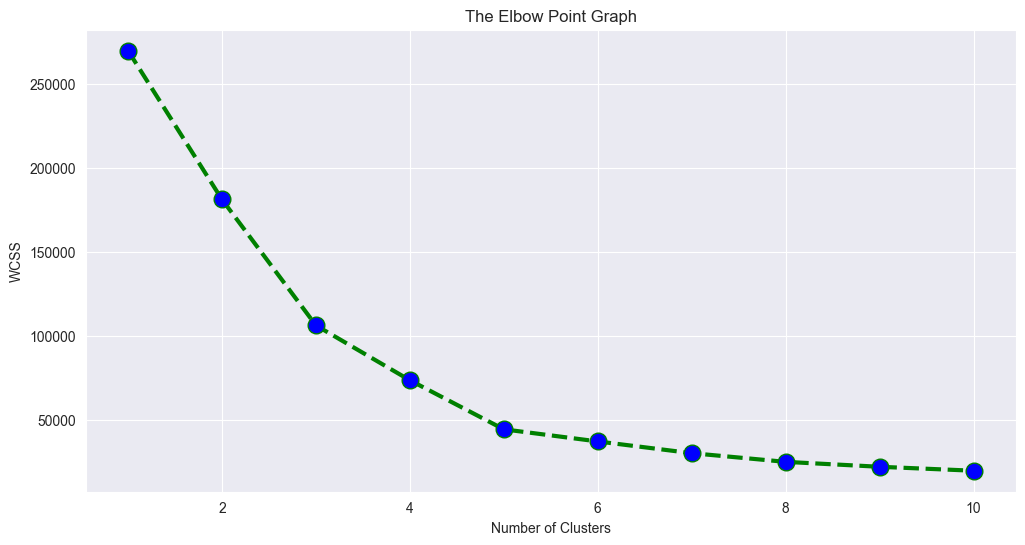

In [28]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

In [29]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++') #initialize the class object
label= kmeans.fit_predict(X) #returns a cluster number for each of the data points
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


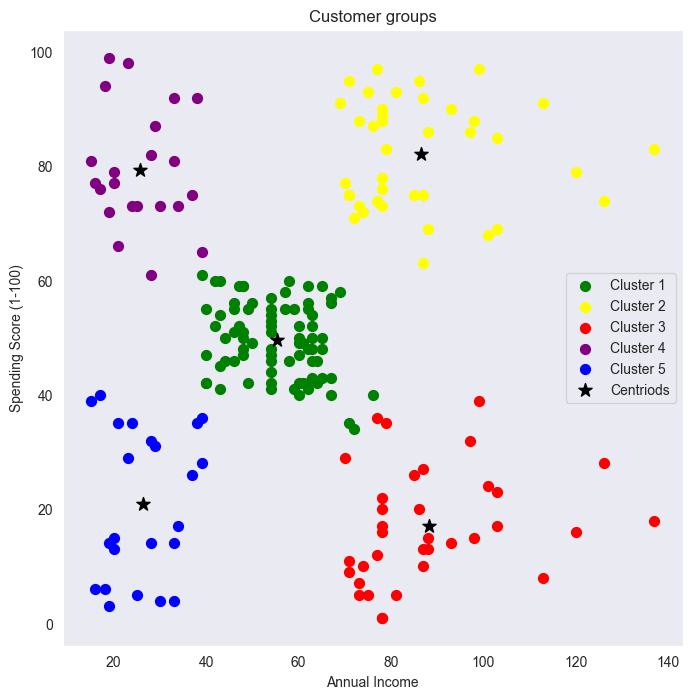

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()  

Insights from marketing point of view

The result of the analysis shows that the retail store customers can be group into 5 clusters or segments for targeted marketing.

Cluster 1 (green): These are average income earners with average spending scores. They are cautious with their spending at the store.

Cluster 2 (yellow): The customers in this group are high income earners and with high spending scores. They bring in profit. Discounts and other offers targeted at this group will increase their spending score and maximize profit.

Cluster 3 (red): This group of customers have a higher income but they do not spend more at the store. One of the assumption could be that they are not satisfied with the services rendered at the store. They are another ideal group to be targeted by the marketing team because they have the potential to bring in increased profit for the store.

Cluster 4 (purple): Low income earners with low spending score. I can assume that this is so because people with low income will tend to purchase less item at the store.

Cluster 5 (blue): These are low income earning customers with high spending scores. I can assume that why this group of customers spend more at the retail store despite earning less is because they enjoy and are satisfied with the services rendered at the retail store.